**GROUP 28**

LAKSH JAIN - 23110185

TANISH YELGOE - 23110328

In [79]:
!wget https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/train.tsv
!wget https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/test.tsv

--2025-03-15 09:24:58--  https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 720259 (703K) [text/plain]
Saving to: ‘train.tsv.2’

train.tsv.2         100%[===================>] 703.38K  --.-KB/s    in 0.007s  

2025-03-15 09:24:58 (92.5 MB/s) - ‘train.tsv.2’ saved [720259/720259]



--2025-03-15 09:24:59--  https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/test.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188749 (184K) [text/plain]
Saving to: ‘test.tsv.2’

test.tsv.2          100%[===================>] 184.33K  --.-KB/s    in 0.003s  

2025-03-15 09:24:59 (56.8 MB/s) - ‘test.tsv.2’ saved [188749/188749]



In [111]:
%pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from torch.utils.tensorboard import SummaryWriter


In [113]:
#Load the dataset into train,test and validation
train = pd.read_csv('train.tsv', sep='\t',header=None)
test = pd.read_csv('test.tsv', sep='\t',header=None)

In [114]:
train

,0,1
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [115]:
#Divide the train set into train and validation set
train, validation = train_test_split(train, test_size=0.2, random_state=42)

In [116]:
train

,0,1
4457,graphic sex may be what 's attracting audience...,1
2471,perhaps the grossest movie ever made,0
26,"the film is moody , oozing , chilling and hear...",1
4828,watching the chemistry between freeman and jud...,1
63,the wonderfully lush morvern callar is pure pu...,1
...,...,...
3772,a summer entertainment adults can see without ...,1
5191,it 's a cool event for the whole family,1
5226,one of the worst films of 2002,0
5390,the trashy teen sleaze equivalent of showgirls,0


In [117]:
mlp1 = nn.Sequential(
    nn.Linear(10000, 512),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(64, 2)  # No activation for final layer (assumes logits for classification)
)

print(mlp1)

Sequential(
  (0): Linear(in_features=10000, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.3, inplace=False)
  (12): Linear(in_features=64, out_features=2, bias=True)
)


In [118]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the number of trainable parameters
print(f"Total trainable parameters: {count_parameters(mlp1)}")


Total trainable parameters: 5293122


In [119]:
mlp2 = nn.Sequential(
    nn.Linear(768, 512),nn.ReLU(),nn.Dropout(0.3), # Model input dimension is 768 to match embedings dimension
    nn.Linear(512, 256),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(256, 128),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(128, 64),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(64, 2)  # No activation for final layer (assumes logits for classification)
)


In [120]:
train_corpus = train[0].tolist()
train_labels = train[1].tolist()
validation_corpus = validation[0].tolist()
validation_labels = validation[1].tolist()

**IMPLEMENTATION 1: BAG OF WORDS**

In [121]:
vectorizer = CountVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(train_corpus)
X_val = vectorizer.transform(validation_corpus)
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [122]:
vectorizer.get_feature_names_out()

array(['000', '10', '100', ..., 'zone', 'zoning', 'zoom'], dtype=object)

In [123]:
vectorizer.get_feature_names_out().size

10000

In [124]:
writer = SummaryWriter(log_dir="runs/bow")

In [ ]:
# Training Loop

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp1.parameters(), lr=0.001)
n_epochs = 10
train_loss = []
train_acc = []
val_loss = []
val_acc = []

best_val_acc = 0.0  # Track the best validation accuracy
best_model_path = "best_model_bow.pth"

for epoch in range(n_epochs):
    mlp1.train()
    optimizer.zero_grad()
    logits = mlp1(torch.tensor(X_train.toarray(), dtype=torch.float32))
    loss = loss_func(logits, torch.tensor(train_labels, dtype=torch.long))
    loss.backward()
    optimizer.step()

    # Tracking training loss
    train_loss.append(loss.item())
    train_accuracy = accuracy_score(train_labels, torch.argmax(logits, dim=1))
    train_acc.append(train_accuracy)
    print(f'Epoch {epoch+1}/{n_epochs}')
    print(f'Train Loss: {loss.item()} Train Accuracy : {train_accuracy}')

    # Tracking validation loss
    mlp1.eval()
    with torch.no_grad():
        logits_val = mlp1(torch.tensor(X_val.toarray(), dtype=torch.float32))
        loss_val = loss_func(logits_val, torch.tensor(validation_labels, dtype=torch.long))

    val_loss.append(loss_val.item())
    val_accuracy = accuracy_score(validation_labels, torch.argmax(logits_val, dim=1))
    val_acc.append(val_accuracy)
    print(f'Validation Loss: {loss_val.item()} Validation Accuracy : {val_accuracy}')
    
    # Log to TensorBoard
    writer.add_scalar("Loss/Train", loss.item(), epoch)
    writer.add_scalar("Loss/Validation", loss_val.item(), epoch)
    writer.add_scalar("Accuracy/Train", train_accuracy, epoch)
    writer.add_scalar("Accuracy/Validation", val_accuracy, epoch)

    # Save the best model based on validation accuracy
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(mlp1.state_dict(), best_model_path)
        print("Best model updated.")

writer.close()


Epoch 1/10
Train Loss: 0.6953110098838806 Train Accuracy : 0.4754335260115607
Validation Loss: 0.6936376690864563 Validation Accuracy : 0.4848265895953757
Best model updated.
Epoch 2/10
Train Loss: 0.6939408183097839 Train Accuracy : 0.4779624277456647
Validation Loss: 0.6926941275596619 Validation Accuracy : 0.4848265895953757
Epoch 3/10
Train Loss: 0.6924598217010498 Train Accuracy : 0.5204118497109826
Validation Loss: 0.6915570497512817 Validation Accuracy : 0.6864161849710982
Best model updated.
Epoch 4/10
Train Loss: 0.6906898617744446 Train Accuracy : 0.5980852601156069
Validation Loss: 0.6896559000015259 Validation Accuracy : 0.6719653179190751
Epoch 5/10
Train Loss: 0.6877871751785278 Train Accuracy : 0.6661849710982659
Validation Loss: 0.686825156211853 Validation Accuracy : 0.690028901734104
Best model updated.
Epoch 6/10
Train Loss: 0.683470606803894 Train Accuracy : 0.740606936416185
Validation Loss: 0.6829961538314819 Validation Accuracy : 0.7210982658959537
Best model upd

FINAL EVALUATION METRICS FOR BOW
Train Loss: 0.6427776217460632 | Train Accuracy : 0.9058887283236994
Validation Loss: 0.6506825089454651 | Validation Accuracy : 0.7608381502890174



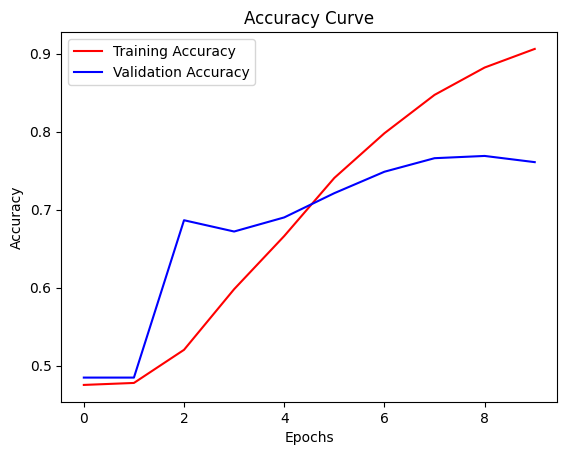

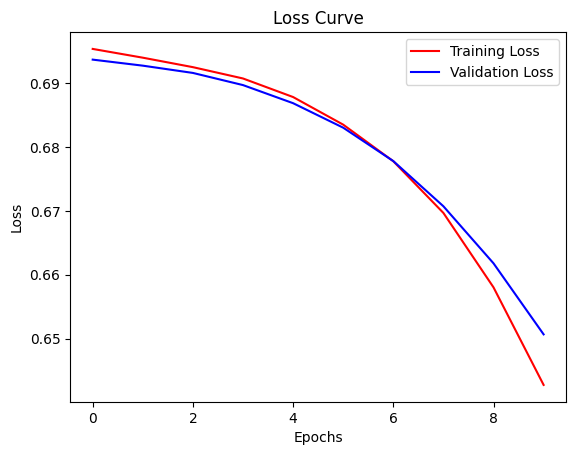


CONFUSION MATRIX FOR VALIDATION DATASET


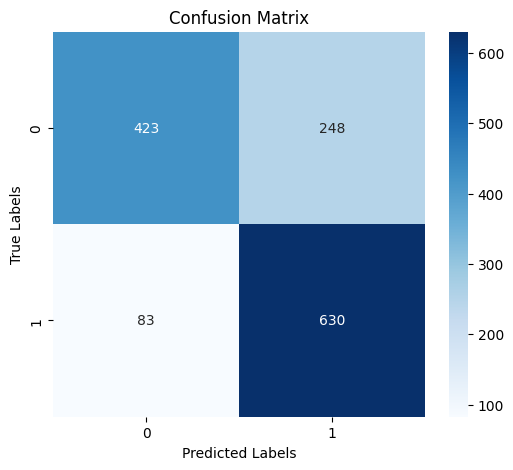

In [126]:
#Final Evaluation Metrics
mlp1.eval()
print("FINAL EVALUATION METRICS FOR BOW")
print(f'Train Loss: {train_loss[-1]} | Train Accuracy : {train_acc[-1]}')
print(f'Validation Loss: {val_loss[-1]} | Validation Accuracy : {val_acc[-1]}')
print()

#Plot the accuracy and validation curves
import matplotlib.pyplot as plt
plt.plot(train_acc, label='Training Accuracy', color = 'r')
plt.plot(val_acc, label='Validation Accuracy', color = 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")
plt.legend()
plt.show()

plt.plot(train_loss, label='Training Loss', color = 'r')
plt.plot(val_loss, label='Validation Loss', color = 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.legend()
plt.show()

#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("\nCONFUSION MATRIX FOR VALIDATION DATASET")
logits_val = mlp1(torch.tensor(X_val.toarray(), dtype=torch.float32))
confusion_mat = confusion_matrix(validation_labels, torch.argmax(logits_val, dim=1))
# print(f'Confusion Matrix: \n{confusion_mat}')
class_labels = ['0' ,'1']
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**IMPLEMENTATION 2: TRAINING MODEL USING EMBEDDINGS**

In [127]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [128]:
#Load pre-trained BERT tokenizer and model
from transformers import BertTokenizer, BertModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased").to(device)

In [129]:
def get_bert_embeddings(text_corpus, tokenizer, model, batch_size=32, strategy="mean"):
    embeddings_list = []
    
    for i in range(0, len(text_corpus), batch_size):
        batch = text_corpus[i : i + batch_size]
        
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to(device)
        
        with torch.no_grad():
            outputs = model(**inputs)
        
        embeddings = outputs.last_hidden_state  # Shape: (batch_size, seq_len, 768)
        
        if strategy == "mean":
            batch_embeddings = torch.mean(embeddings, dim=1)  # Shape: (batch_size, 768)
            embeddings_list.append(batch_embeddings)

    return torch.cat(embeddings_list, dim=0)  # Shape: (num_samples, 768)


In [130]:
train_corpus_embeddings = get_bert_embeddings(train_corpus,tokenizer,model)
validation_corpus_embeddings = get_bert_embeddings(validation_corpus,tokenizer,model)

In [131]:
writer = SummaryWriter(log_dir="runs/embeddings_model")

In [ ]:
# Training Loop

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp2.parameters(), lr=0.001)
n_epochs = 10
train_loss = []
train_acc = []
val_loss = []
val_acc = []

best_val_acc = 0.0  # Track the best validation accuracy
best_model_path = "best_model_embeddings.pth"

for epoch in range(n_epochs):
    mlp2.train()
    optimizer.zero_grad()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Move model to device
    mlp2.to(device)

    # Move tensors to device
    train_corpus_embeddings = train_corpus_embeddings.to(device)
    train_labels = torch.tensor(train_labels, dtype=torch.long, device=device)
    logits = mlp2(train_corpus_embeddings)
    loss = loss_func(logits, train_labels)
    loss.backward()
    optimizer.step()

    # Tracking training loss
    train_loss.append(loss.item())
    # train_accuracy = accuracy_score(train_labels, torch.argmax(logits, dim=1))

    train_accuracy = accuracy_score(
        train_labels.cpu().numpy(), torch.argmax(logits, dim=1).cpu().numpy()
    )
    train_acc.append(train_accuracy)
    print(f'Epoch {epoch+1}/{n_epochs}')
    print(f'Train Loss: {loss.item()} Train Accuracy : {train_accuracy}')

    # Tracking validation loss
    mlp2.eval()
    with torch.no_grad():
        logits_val = mlp2(validation_corpus_embeddings)
        validation_labels = torch.tensor(validation_labels, dtype=torch.long, device=device)
        loss_val = loss_func(logits_val, validation_labels)

    val_loss.append(loss_val.item())
    val_accuracy = accuracy_score(
        validation_labels.cpu().numpy(), torch.argmax(logits_val, dim=1).cpu().numpy()
    )
    val_acc.append(val_accuracy)
    print(f'Validation Loss: {loss_val.item()} Validation Accuracy : {val_accuracy}')

    # Log to TensorBoard
    writer.add_scalar("Loss/Train", loss.item(), epoch)
    writer.add_scalar("Loss/Validation", loss_val.item(), epoch)
    writer.add_scalar("Accuracy/Train", train_accuracy, epoch)
    writer.add_scalar("Accuracy/Validation", val_accuracy, epoch)

    # Save the best model based on validation accuracy
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(mlp2.state_dict(), best_model_path)
        print("Best model updated.")




Epoch 1/10
Train Loss: 0.6951567530632019 Train Accuracy : 0.4752528901734104
Validation Loss: 0.6912474036216736 Validation Accuracy : 0.7117052023121387
Best model updated.
Epoch 2/10
Train Loss: 0.6916710734367371 Train Accuracy : 0.5382947976878613
Validation Loss: 0.6869787573814392 Validation Accuracy : 0.5223988439306358
Epoch 3/10
Train Loss: 0.6871028542518616 Train Accuracy : 0.5700867052023122
Validation Loss: 0.6784733533859253 Validation Accuracy : 0.5440751445086706
Epoch 4/10
Train Loss: 0.6791136860847473 Train Accuracy : 0.5789378612716763
Validation Loss: 0.6623886227607727 Validation Accuracy : 0.6401734104046243
Epoch 5/10
Train Loss: 0.6661970019340515 Train Accuracy : 0.6371026011560693
Validation Loss: 0.6378722190856934 Validation Accuracy : 0.7471098265895953
Best model updated.
Epoch 6/10
Train Loss: 0.6444618105888367 Train Accuracy : 0.7149566473988439
Validation Loss: 0.6042215824127197 Validation Accuracy : 0.763728323699422
Best model updated.
Epoch 7/10


/tmp/ipykernel_2286/3685902665.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.long, device=device)
/tmp/ipykernel_2286/3685902665.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  validation_labels = torch.tensor(validation_labels, dtype=torch.long, device=device)
/tmp/ipykernel_2286/3685902665.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.long, device=device)
/tmp/ipykernel_2286/3685902665.py:45: UserWarning: To cop

FINAL EVALUATION METRICS FOR EMBEDDINGS
Train Loss: 0.49745723605155945 | Train Accuracy : 0.8076228323699421
Validation Loss: 0.4234275221824646 | Validation Accuracy : 0.8388728323699421



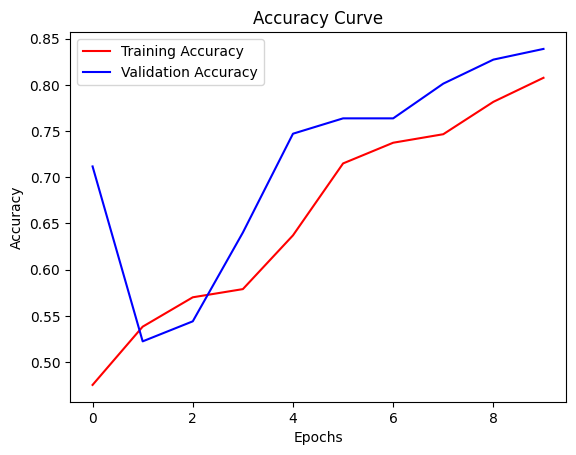

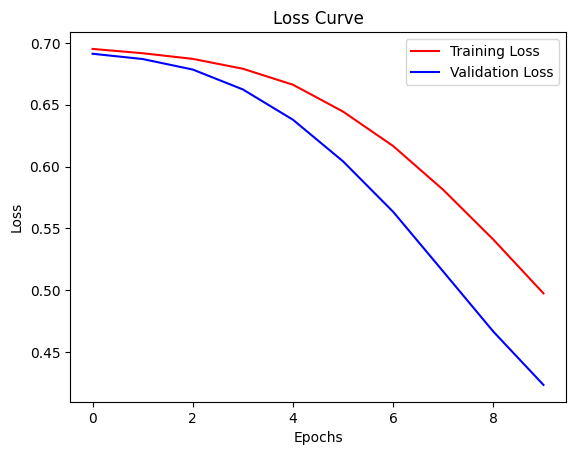


CONFUSION MATRIX FOR VALIDATION DATASET


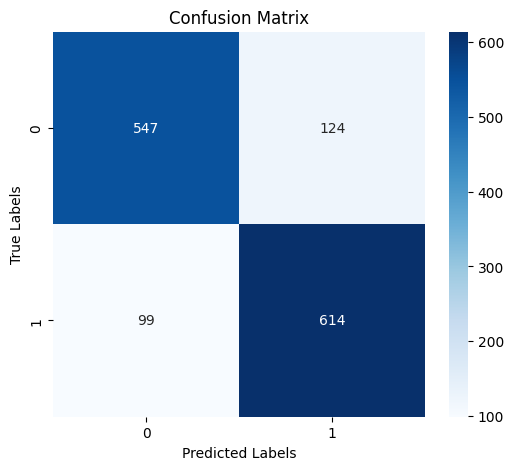

In [133]:
#Final Evaluation Metrics
mlp2.eval()
print("FINAL EVALUATION METRICS FOR EMBEDDINGS")
print(f'Train Loss: {train_loss[-1]} | Train Accuracy : {train_acc[-1]}')
print(f'Validation Loss: {val_loss[-1]} | Validation Accuracy : {val_acc[-1]}')
print()

#Plot the accuracy and validation curves
import matplotlib.pyplot as plt
plt.plot(train_acc, label='Training Accuracy', color = 'r')
plt.plot(val_acc, label='Validation Accuracy', color = 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")
plt.legend()
plt.show()

plt.plot(train_loss, label='Training Loss', color = 'r')
plt.plot(val_loss, label='Validation Loss', color = 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.legend()
plt.show()

#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("\nCONFUSION MATRIX FOR VALIDATION DATASET")
logits_val = mlp2(validation_corpus_embeddings)
confusion_mat = confusion_matrix(validation_labels.cpu().numpy(), torch.argmax(logits_val, dim=1).cpu().numpy())
# print(f'Confusion Matrix: \n{confusion_mat}')
class_labels = ['0' ,'1']
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **RESUME TRAINING ON IMDB DATASET**

In [101]:
! wget https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv

--2025-03-15 09:25:24--  https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB-Dataset.csv.2’

IMDB-Dataset.csv.2  100%[===================>]  63.14M   138MB/s    in 0.5s    

2025-03-15 09:25:25 (138 MB/s) - ‘IMDB-Dataset.csv.2’ saved [66212309/66212309]



In [ ]:
#Load the dataset into train test and validation
imdb_data = pd.read_csv('IMDB-Dataset.csv')
imdb_data['label'] = imdb_data['sentiment'].map({'positive': 1, 'negative': 0})
imdb_data

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [103]:
imdb_train_data, imdb_test_data = train_test_split(imdb_data, test_size=0.2, random_state=42)
imdb_train_data, imdb_val_data = train_test_split(imdb_train_data, test_size=0.2, random_state=42)

In [104]:
imdb_train_corpus = imdb_train_data['review'].tolist()
imdb_train_labels = imdb_train_data['label'].tolist()
imdb_validation_corpus = imdb_val_data['review'].tolist()
imdb_validation_labels = imdb_val_data['label'].tolist()

**1] RESUME TRAINING USING BAG OF WORDS**

In [105]:
imdb_X_train = vectorizer.transform(imdb_train_corpus)
imdb_X_val = vectorizer.transform(imdb_validation_corpus)

In [149]:
writer = SummaryWriter("runs/imdb_bow")

In [155]:
#Load the best checkpoint
model_loaded_bow = nn.Sequential(
    nn.Linear(10000, 512),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(512, 256),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(256, 128),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(128, 64),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(64, 2)  # No activation for final layer (assumes logits for classification)
)
model_loaded_bow.load_state_dict(torch.load("best_model_bow.pth"))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_loaded_bow.parameters(), lr=0.0001)  # Smaller learning rate
n_epochs = 10

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(n_epochs):
    model_loaded_bow.train()
    optimizer.zero_grad()

    model_loaded_bow.to(device)
    logits = model_loaded_bow(torch.tensor(imdb_X_train.toarray(), dtype=torch.float32, device=device))
    imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)
    loss = loss_func(logits,imdb_train_labels)
    loss.backward()
    optimizer.step()

    # Tracking training loss
    train_loss.append(loss.item())
    train_accuracy = accuracy_score(imdb_train_labels.cpu().numpy(), torch.argmax(logits, dim=1).cpu().numpy())
    train_acc.append(train_accuracy)
    print(f'Epoch {epoch+1}/{n_epochs}')
    print(f'Train Loss: {loss.item()} Train Accuracy : {train_accuracy}')

    # Tracking validation loss
    model_loaded_bow.eval()
    with torch.no_grad():
        logits_val = model_loaded_bow(torch.tensor(imdb_X_val.toarray(), dtype=torch.float32, device=device))
        imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)
        loss_val = loss_func(logits_val, imdb_validation_labels)

    val_loss.append(loss_val.item())
    val_accuracy = accuracy_score(imdb_validation_labels.cpu().numpy(), torch.argmax(logits_val, dim=1).cpu().numpy())
    val_acc.append(val_accuracy)

    writer.add_scalar("Loss/Train", loss.item(), epoch)
    writer.add_scalar("Loss/Validation", loss_val.item(), epoch)
    writer.add_scalar("Accuracy/Train", train_accuracy, epoch)
    writer.add_scalar("Accuracy/Validation", val_accuracy, epoch)
    print(f'Validation Loss: {loss_val.item()} Validation Accuracy : {val_accuracy}')
writer.close()

/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 1/10
Train Loss: 0.6175968050956726 Train Accuracy : 0.7138125


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


Validation Loss: 0.5904448628425598 Validation Accuracy : 0.761625


/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 2/10
Train Loss: 0.6041326522827148 Train Accuracy : 0.74284375


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


Validation Loss: 0.5800657868385315 Validation Accuracy : 0.78075


/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 3/10
Train Loss: 0.5952691435813904 Train Accuracy : 0.75546875


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


Validation Loss: 0.5748967528343201 Validation Accuracy : 0.7815


/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 4/10
Train Loss: 0.5904573798179626 Train Accuracy : 0.7559375


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


Validation Loss: 0.5720154047012329 Validation Accuracy : 0.777


/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 5/10
Train Loss: 0.5868505835533142 Train Accuracy : 0.75590625


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


Validation Loss: 0.5684310793876648 Validation Accuracy : 0.77675


/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 6/10
Train Loss: 0.5839412212371826 Train Accuracy : 0.75203125


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


Validation Loss: 0.5627538561820984 Validation Accuracy : 0.780625


/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 7/10
Train Loss: 0.5790843367576599 Train Accuracy : 0.75975


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


Validation Loss: 0.5554437637329102 Validation Accuracy : 0.786375


/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 8/10
Train Loss: 0.5715555548667908 Train Accuracy : 0.76465625


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


Validation Loss: 0.5476364493370056 Validation Accuracy : 0.79625


/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 9/10
Train Loss: 0.5655698180198669 Train Accuracy : 0.7735625


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


Validation Loss: 0.5403628349304199 Validation Accuracy : 0.80375


/tmp/ipykernel_2286/4057736793.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels =  torch.tensor(imdb_train_labels, dtype=torch.long, device = device)


Epoch 10/10
Train Loss: 0.5579841732978821 Train Accuracy : 0.7805625
Validation Loss: 0.5342373847961426 Validation Accuracy : 0.802875


/tmp/ipykernel_2286/4057736793.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device=device)


FINAL EVALUATION METRICS FOR BOW
Train Loss: 0.5579841732978821 | Train Accuracy : 0.7805625
Validation Loss: 0.5342373847961426 | Validation Accuracy : 0.802875



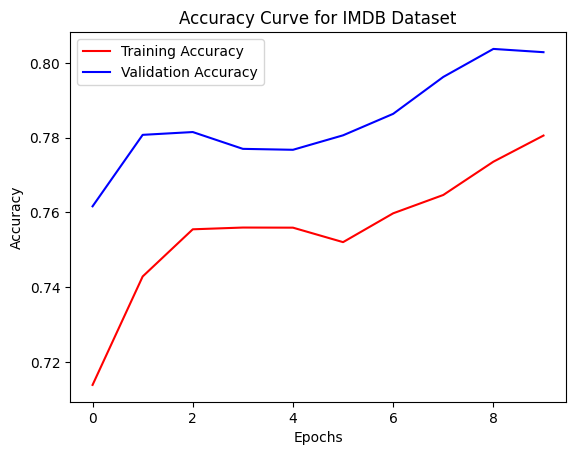

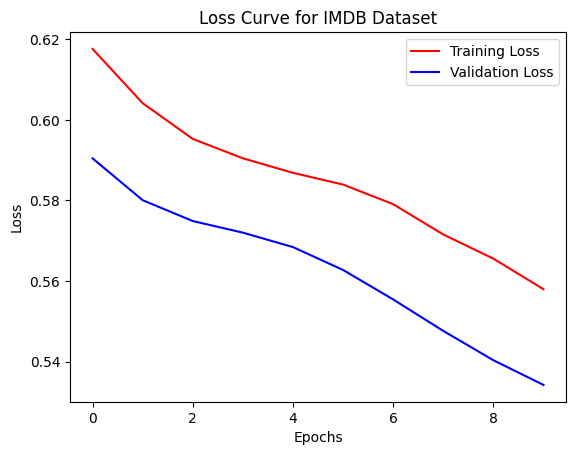


CONFUSION MATRIX FOR VALIDATION DATASET FOR IMDB DATASET


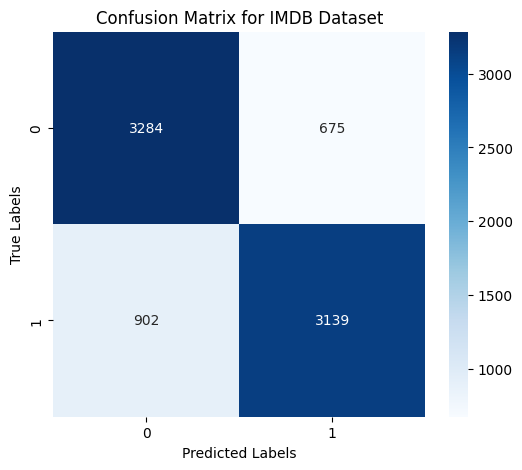

In [158]:
#Final Evaluation Metrics
model_loaded_bow.eval()
print("FINAL EVALUATION METRICS FOR BOW")
print(f'Train Loss: {train_loss[-1]} | Train Accuracy : {train_acc[-1]}')
print(f'Validation Loss: {val_loss[-1]} | Validation Accuracy : {val_acc[-1]}')
print()

#Plot the accuracy and validation curves
import matplotlib.pyplot as plt
plt.plot(train_acc, label='Training Accuracy', color = 'r')
plt.plot(val_acc, label='Validation Accuracy', color = 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve for IMDB Dataset")
plt.legend()
plt.show()

plt.plot(train_loss, label='Training Loss', color = 'r')
plt.plot(val_loss, label='Validation Loss', color = 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve for IMDB Dataset")
plt.legend()
plt.show()

#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("\nCONFUSION MATRIX FOR VALIDATION DATASET FOR IMDB DATASET")
logits_val = model_loaded_bow(torch.tensor(imdb_X_val.toarray(), dtype=torch.float32, device=device))
confusion_mat = confusion_matrix(imdb_validation_labels.cpu().numpy(), torch.argmax(logits_val, dim=1).cpu().numpy())
# print(f'Confusion Matrix: \n{confusion_mat}')
class_labels = ['0' ,'1']
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for IMDB Dataset')
plt.show()

**2] RESUME TRAINING USING EMBEDDINGS**

In [159]:
imdb_train_corpus_embeddings = get_bert_embeddings(imdb_train_corpus,tokenizer,model)
imdb_validation_corpus_embeddings = get_bert_embeddings(imdb_validation_corpus,tokenizer,model)

In [160]:
writer = SummaryWriter("runs/imdb_embedding_model")

In [161]:
#Load the best checkpoint
model_loaded_embeddings = nn.Sequential(
    nn.Linear(768, 512),nn.ReLU(),nn.Dropout(0.3), # input dimensions = embeddings dimension = 768
    nn.Linear(512, 256),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(256, 128),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(128, 64),nn.ReLU(),nn.Dropout(0.3),
    nn.Linear(64, 2)  # No activation for final layer (assumes logits for classification)
)
model_loaded_embeddings.load_state_dict(torch.load("best_model_embeddings.pth"))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_loaded_embeddings.parameters(), lr=0.0001)  # Smaller learning rate
n_epochs = 10

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(n_epochs):
    model_loaded_embeddings.train()
    optimizer.zero_grad()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_loaded_embeddings.to(device)

    imdb_train_corpus_embeddings = imdb_train_corpus_embeddings.to(device)

    logits = model_loaded_embeddings(imdb_train_corpus_embeddings)
    imdb_train_labels = torch.tensor(imdb_train_labels, dtype=torch.long, device=device)
    loss = loss_func(logits, imdb_train_labels)
    loss.backward()
    optimizer.step()

    # Tracking training loss
    train_loss.append(loss.item())
    train_accuracy = accuracy_score(imdb_train_labels.cpu().numpy(), torch.argmax(logits, dim=1).cpu().numpy())
    train_acc.append(train_accuracy)
    print(f'Epoch {epoch+1}/{n_epochs}')
    print(f'Train Loss: {loss.item()} Train Accuracy : {train_accuracy}')

    # Tracking validation loss
    model_loaded_embeddings.eval()
    with torch.no_grad():
        logits_val = model_loaded_embeddings(imdb_validation_corpus_embeddings)
        imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device = device)
        loss_val = loss_func(logits_val, imdb_validation_labels)

    val_loss.append(loss_val.item())
    val_accuracy = accuracy_score(imdb_validation_labels.cpu().numpy(), torch.argmax(logits_val, dim=1).cpu().numpy())
    val_acc.append(val_accuracy)


    writer.add_scalar("Loss/Train", loss.item(), epoch)
    writer.add_scalar("Loss/Validation", loss_val.item(), epoch)
    writer.add_scalar("Accuracy/Train", train_accuracy, epoch)
    writer.add_scalar("Accuracy/Validation", val_accuracy, epoch)
    
    print(f'Validation Loss: {loss_val.item()} Validation Accuracy : {val_accuracy}')

Epoch 1/10
Train Loss: 0.5183415412902832 Train Accuracy : 0.78821875
Validation Loss: 0.475151002407074 Validation Accuracy : 0.823875
Epoch 2/10
Train Loss: 0.5072173476219177 Train Accuracy : 0.7944375
Validation Loss: 0.4683833420276642 Validation Accuracy : 0.821875
Epoch 3/10
Train Loss: 0.506285548210144 Train Accuracy : 0.78565625
Validation Loss: 0.46503013372421265 Validation Accuracy : 0.820125
Epoch 4/10
Train Loss: 0.5039001107215881 Train Accuracy : 0.78365625
Validation Loss: 0.4601801931858063 Validation Accuracy : 0.825375
Epoch 5/10
Train Loss: 0.4978800117969513 Train Accuracy : 0.7925625
Validation Loss: 0.45595356822013855 Validation Accuracy : 0.8285
Epoch 6/10
Train Loss: 0.492461234331131 Train Accuracy : 0.7989375
Validation Loss: 0.45391353964805603 Validation Accuracy : 0.831625
Epoch 7/10
Train Loss: 0.48917627334594727 Train Accuracy : 0.80225
Validation Loss: 0.4530412256717682 Validation Accuracy : 0.831
Epoch 8/10
Train Loss: 0.4852086007595062 Train Acc

/tmp/ipykernel_2286/4012133332.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels = torch.tensor(imdb_train_labels, dtype=torch.long, device=device)
/tmp/ipykernel_2286/4012133332.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_validation_labels = torch.tensor(imdb_validation_labels, dtype=torch.long, device = device)
/tmp/ipykernel_2286/4012133332.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imdb_train_labels = torch.tensor(imdb_train_labels, dtype=torch.long, device=device)
/tmp/ipykernel_2286/40121

FINAL EVALUATION METRICS FOR EMBEDDINGS
Train Loss: 0.4785939157009125 | Train Accuracy : 0.809625
Validation Loss: 0.44071438908576965 | Validation Accuracy : 0.833875



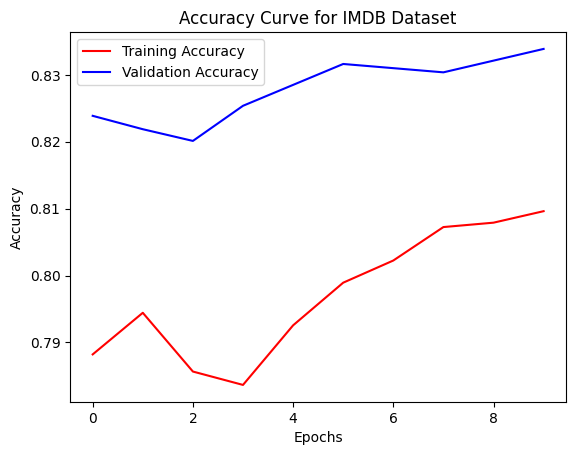

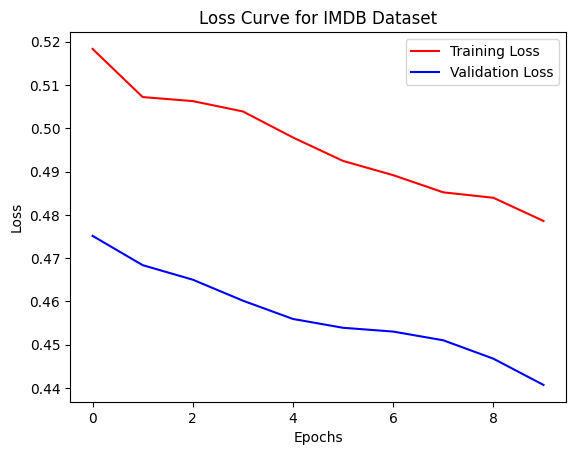


CONFUSION MATRIX FOR VALIDATION DATASET FOR IMDB DATASET


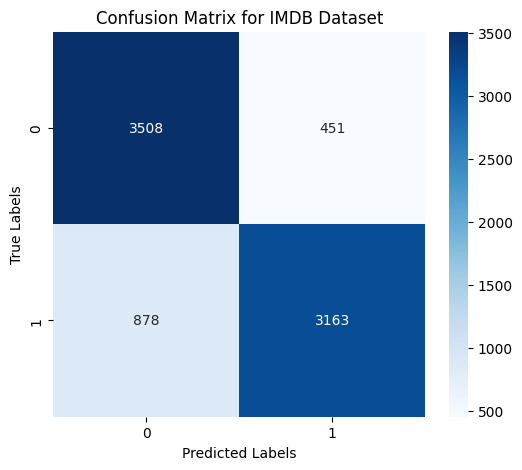

In [162]:
#Final Evaluation Metrics
model_loaded_embeddings.eval()
print("FINAL EVALUATION METRICS FOR EMBEDDINGS")
print(f'Train Loss: {train_loss[-1]} | Train Accuracy : {train_acc[-1]}')
print(f'Validation Loss: {val_loss[-1]} | Validation Accuracy : {val_acc[-1]}')
print()

#Plot the accuracy and validation curves
import matplotlib.pyplot as plt
plt.plot(train_acc, label='Training Accuracy', color = 'r')
plt.plot(val_acc, label='Validation Accuracy', color = 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve for IMDB Dataset")
plt.legend()
plt.show()

plt.plot(train_loss, label='Training Loss', color = 'r')
plt.plot(val_loss, label='Validation Loss', color = 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve for IMDB Dataset")
plt.legend()
plt.show()

#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("\nCONFUSION MATRIX FOR VALIDATION DATASET FOR IMDB DATASET")
logits_val = model_loaded_embeddings(imdb_validation_corpus_embeddings)
confusion_mat = confusion_matrix(imdb_validation_labels.cpu().numpy(), torch.argmax(logits_val, dim=1).cpu().numpy())
# print(f'Confusion Matrix: \n{confusion_mat}')
class_labels = ['0' ,'1']
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for IMDB Dataset')
plt.show()

In [164]:
%reload_ext tensorboard


In [165]:
!kill 62159

In [166]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
